#### Load required libraries

In [1]:
import numpy as np
import logging
import pickle
# required libraries for Reconstructor matrix computation or MPC
from scipy import sparse

import os.path
from os import path

from pathlib import Path
import dos


sim_folder = 'dos/SHWFS_ES'

#### Compute reconstructor from interacion matrix

In [30]:
# * * * Flag to control if reconstructor matrix is updated * * *
updateReconst = True

if (not path.exists(sim_folder+'/ReconstructorM.pickle')) or (updateReconst):
    # Open pickle data file
    file = open('/Users/rromano/Workspace/GMT_AcO/Reconstructor/AcO_SHWFS_Rec.pickle', 'rb')
#    file = open('/Users/rromano/Workspace/GMT_AcO/Reconstructor/AcO_SHWFS_ES_Rec.pickle', 'rb')
    # dump information from that file
    RecDt = pickle.load(file)
    # close the file
    file.close()
    
    dos.tools.linear_estimator_2_dos(RecDt['simceoM'],sim_folder+'/ReconstructorM', B_or_D='D')
#    dos.tools.linear_estimator_2_dos(RecDt['simceoMa'].toarray(),sim_folder+'/ReconstructorM', B_or_D='D')
    print('Reconstructor matrix pickle file is updated!')


Reconstructor matrix pickle file is updated!


#### Set initial M1/M2 states and generate respective yaml files

In [ ]:
# Python code to set simulation states...
from ruamel import yaml
from ruamel.yaml import YAML

# * * * Flag to control if simulation initial state is updated * * *
updateState0 = False

asec2rad = 4.84814e-6
n_bm = 46
k_states = 0
x0 = np.zeros(42+42+7*n_bm)

if (not path.exists(sim_folder+'/M1.yaml')) or (updateState0):
    # M1 random initial values
    x0_M1_Txy = k_states*75.0e-6*np.random.randn(7,2)
    x0_M1_Tz = k_states*np.hstack([160.0e-6*np.random.randn(6),0]).reshape((7, 1))
    x0_M1_Rxy = k_states*0.38*asec2rad*np.random.randn(7,2)
    x0_M1_Rz = k_states*40*asec2rad*np.random.randn(7,1)
    x0_BM = k_states*4e-6*np.random.randn(7, n_bm)

    
    M1dict = {
        'mirror' : 'M1',
        'mirror_args': {'mirror_modes':'bending modes', 
                        'N_MODE':27},
        'state': {'Txyz': np.hstack([x0_M1_Txy, x0_M1_Tz]).tolist(),
                  'Rxyz': np.hstack([x0_M1_Rxy, x0_M1_Rz]).tolist(),
                  'modes': x0_BM.tolist() }
    }
    # Dump M1 inital state
    y = YAML()
    y.default_flow_style = None
    with open(Path(sim_folder)/'M1.yaml','w') as f:
        y.dump(M1dict, f)

if (not path.exists(sim_folder+'/M2.yaml')) or (updateState0):        
    # M2 random initial values
    x0_M2_Txy = k_states*75.0e-6*np.random.randn(7,2)
    x0_M2_Tz = k_states*170.0e-6*np.random.randn(7,1)
    x0_M2_Rxy = k_states*3.0*asec2rad*np.random.randn(7,2)
    x0_M2_Rz = k_states*330*asec2rad*np.random.randn(7,1)

    M2dict = {
        'mirror' : 'M2',
        'mirror_args': {},
        'state': {'Txyz': np.hstack([x0_M2_Txy, x0_M2_Tz]).tolist(),
                  'Rxyz': np.hstack([x0_M2_Rxy, x0_M2_Rz]).tolist()}
    }
    # Dump M2 inital state
    with open(Path(sim_folder)/'M2.yaml','w') as f:
        y.dump(M2dict, f)


#### Invoke DOS

In [59]:
sim = dos.DOS(sim_folder,verbose=logging.INFO,show_timing=2)

INFO:DOS:Reading config from dos/SHWFS_ES/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: data
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: M1_ES
INFO:M1_ES:No inputs!
INFO:M1_ES:New output: deltas
INFO:M1_ES:Output logged in!
INFO:DOS:New driver: ReconstructorM
INFO:ReconstructorM:New input: SH-WFS
INFO:ReconstructorM:New output: x_hat
INFO:ReconstructorM:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz


SIMCEO server received: Acknowledging connection from SIMCEO client!


INFO:DOS:Simulation setup for a duration of 50s @ 1Hz (50 steps)!


In [ ]:
sim.push()

In [ ]:
sim.init()

In [ ]:
sim.terminate()

In [60]:
# Start simulation
sim.start()

INFO:DOS:Pushing configuration to server
INFO:M1:GMT
INFO:M2:GMT
INFO:wfs48:OP4
INFO:M1_ES:EdgeSensors
INFO:science:OP5
INFO:DOS:Initializing
INFO:M1:None
INFO:M2:None
INFO:wfs48:None
INFO:M1_ES:None
INFO:science:None
INFO:DOS:Running
INFO:DOS:Terminating
INFO:M1:GMT deleted!
INFO:M2:GMT deleted!
INFO:wfs48:OpticalPath deleted!
INFO:M1_ES:EdgeSensors deleted!
INFO:science:OpticalPath deleted!


Elapsed time: 27.75954294204712


In [21]:
sim.logs.entries.keys()

dict_keys(['wfs48', 'M1_ES', 'ReconstructorM', 'AcO_controller', 'science'])

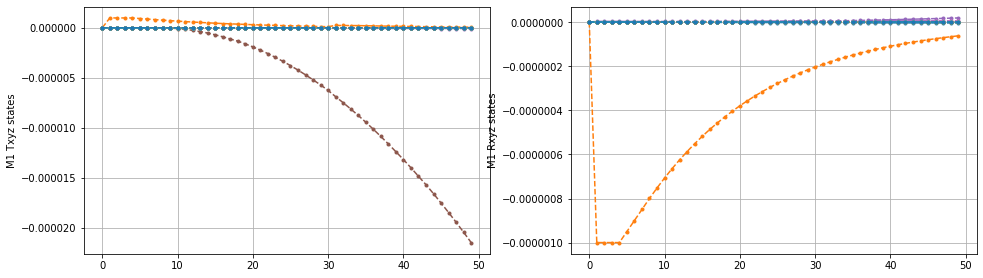

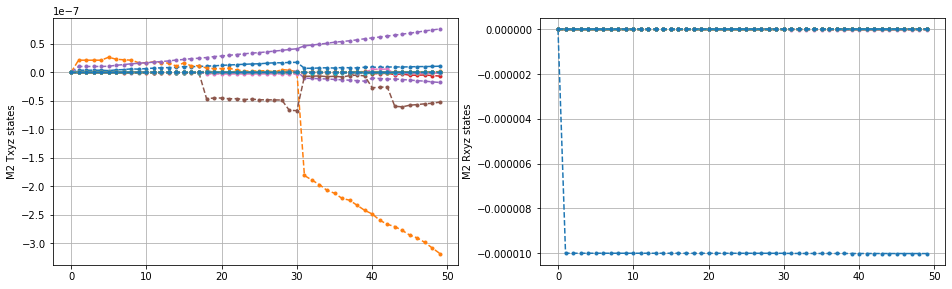

M1 Txyz:
Seg# 1 : [-1.04804045e-09  6.26621644e-08  9.20316287e-12]
Seg# 2 : [ 1.49766629e-08  9.43362599e-10 -2.14802697e-05]
Seg# 3 : [-1.12179163e-10 -1.81604209e-08  3.49261827e-12]
Seg# 4 : [ 7.02185779e-10  3.04105215e-12 -1.45049697e-09]
Seg# 5 : [ 1.80151223e-10 -5.78615511e-11 -7.22017573e-08]
Seg# 6 : [-8.61166797e-10  4.87696502e-09  5.28630918e-10]
Seg# 7 : [-6.45087410e-11  8.43003302e-11  4.17509777e-11]

 M1 Rxyz:
Seg# 1 : [-4.21778368e-09 -6.24148474e-08 -7.00216241e-10]
Seg# 2 : [-4.13303852e-11  1.86118426e-08  1.24293195e-09]
Seg# 3 : [ 4.95579970e-10 -4.99247436e-10 -6.61967520e-12]
Seg# 4 : [-7.19044613e-12 -2.00380570e-11  1.94829050e-11]
Seg# 5 : [ 1.58501081e-12 -1.58230092e-12  5.70885752e-09]
Seg# 6 : [ 8.93315713e-11  3.73073294e-09 -8.89081119e-10]
Seg# 7 : [3.31474937e-11 2.27555835e-11 0.00000000e+00]

 M2 Txyz:
Seg# 1 : [ 1.09400012e-08 -3.18283426e-07  4.19902294e-10]
Seg# 2 : [-6.46934653e-09 -1.77200364e-08 -5.21867678e-08]
Seg# 3 : [4.46793045e-11 5.1

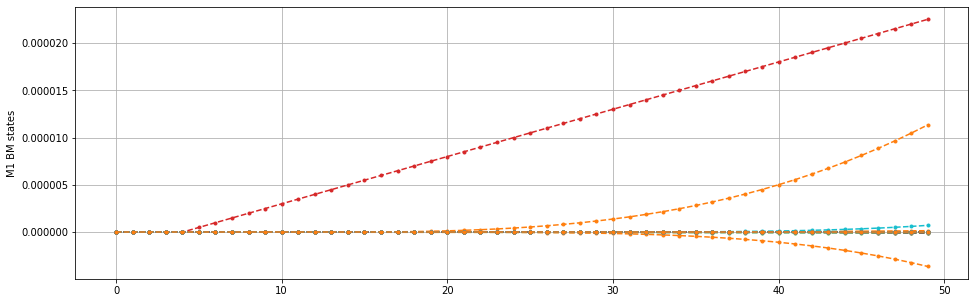

In [61]:
X = sim.logs.entries['ReconstructorM']['x_hat'].timeSeries

# Indices for M1 states
auxTxy = np.array([0,1, 6,7, 12,13, 18,19, 24,25, 30,31, 36,37])
auxTz = np.array([2, 8, 14, 20, 26, 32, 38])
auxRxy = auxTxy + 3
auxRz = auxTz + 3

xM1_Txyz = np.hstack((X[1][:,auxTxy],X[1][:,auxTz]))
xM1_Rxyz = np.hstack((X[1][:,auxRxy],X[1][:,auxRz]))

xM2_Txyz = np.hstack((X[1][:,auxTxy+42],X[1][:,auxTz+42]))
xM2_Rxyz = np.hstack((X[1][:,auxRxy+42],X[1][:,auxRz+42]))

xM1_BM = X[1][:,84:]

scale = 1.0

# Plot mirror states
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(X[0],xM1_Txyz,'.--')
plt.grid(True)
plt.ylabel('M1 Txyz states')
    
plt.subplot(222)
plt.plot(X[0],xM1_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M1 Rxyz states')    

plt.figure(figsize=(16,10))
plt.subplot(223)
plt.plot(X[0],xM2_Txyz,'.--')
plt.grid(True)
plt.ylabel('M2 Txyz states')
    
plt.subplot(224)
plt.plot(X[0],xM2_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M2 Rxyz states')   
plt.show()

plt.figure(figsize=(16,5))
plt.plot(X[0],xM1_BM,'.--')
plt.grid(True)
plt.ylabel('M1 BM states')

print('M1 Txyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM1_Txyz[-1,0+(k*3):3+(k*3)])
    
print('\n M1 Rxyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM1_Rxyz[-1,0+(k*3):3+(k*3)])
    
print('\n M2 Txyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM2_Txyz[-1,0+(k*3):3+(k*3)])
    
print('\n M2 Rxyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM2_Rxyz[-1,0+(k*3):3+(k*3)])

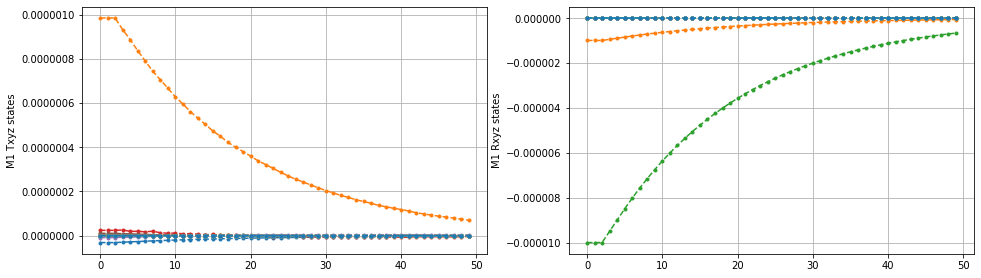

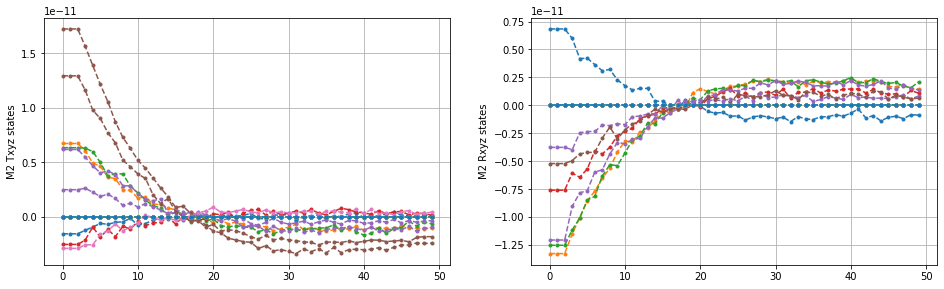

M1 Txyz:
Seg# 1 : [-2.14184284e-09  6.97084253e-08 -4.14386834e-10]
Seg# 2 : [-3.88320107e-09 -8.72852001e-11 -9.79055502e-11]
Seg# 3 : [1.24398958e-11 1.73116473e-12 1.80318030e-12]
Seg# 4 : [-9.40373655e-12 -3.10257400e-12  3.28244467e-12]
Seg# 5 : [ 3.12789894e-12 -2.15582835e-14  1.24736661e-09]
Seg# 6 : [-1.49549617e-09 -7.87063086e-11  3.08809753e-12]
Seg# 7 : [7.65819385e-13 4.28163772e-12 2.83078129e-12]

 M1 Rxyz:
Seg# 1 : [-1.05862861e-11 -6.69458318e-08 -6.69872867e-07]
Seg# 2 : [-2.14557396e-10  2.15908037e-12 -2.68641179e-12]
Seg# 3 : [-6.82763524e-12 -2.75344047e-12  3.26412266e-13]
Seg# 4 : [-8.55626339e-13  5.59806007e-13 -1.77499595e-12]
Seg# 5 : [-1.15759123e-12  3.06645161e-12  2.00498959e-10]
Seg# 6 : [-7.63527127e-10 -1.10153063e-11 -2.77269648e-12]
Seg# 7 : [-3.59125446e-13 -5.44954792e-13  6.74227016e-13]

 M2 Txyz:
Seg# 1 : [ 1.23046176e-13 -1.05727481e-12 -6.19930639e-13]
Seg# 2 : [ 1.49061111e-13 -3.35940174e-13 -2.40280956e-12]
Seg# 3 : [0. 0. 0.]
Seg# 4 : [0

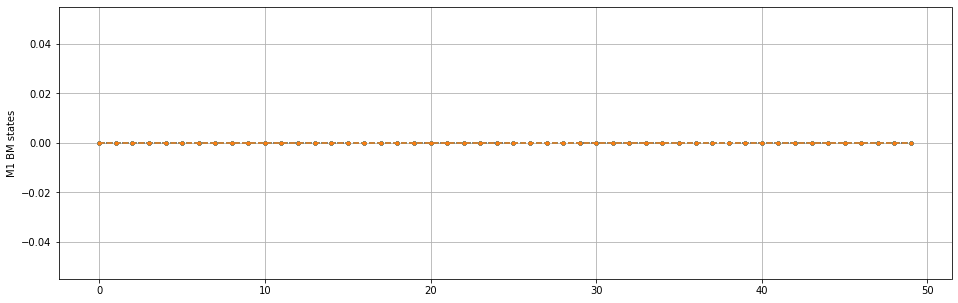

In [58]:
Z = sim.logs.entries['wfs48']['M12_RBM'].timeSeries

# Indices for M1 states
auxTxy = np.array([0,1, 6,7, 12,13, 18,19, 24,25, 30,31, 36,37])
auxTz = np.array([2, 8, 14, 20, 26, 32, 38])
auxRxy = auxTxy + 3
auxRz = auxTz + 3

xM1_Txyz = np.hstack((Z[1][:,auxTxy],Z[1][:,auxTz]))
xM1_Rxyz = np.hstack((Z[1][:,auxRxy],Z[1][:,auxRz]))

xM2_Txyz = np.hstack((Z[1][:,auxTxy+42],Z[1][:,auxTz+42]))
xM2_Rxyz = np.hstack((Z[1][:,auxRxy+42],Z[1][:,auxRz+42]))

xM1_BM = Z[1][:,84:]

scale = 1.0

# Plot mirror states
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(X[0],xM1_Txyz,'.--')
plt.grid(True)
plt.ylabel('M1 Txyz states')
    
plt.subplot(222)
plt.plot(X[0],xM1_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M1 Rxyz states')    

plt.figure(figsize=(16,10))
plt.subplot(223)
plt.plot(X[0],xM2_Txyz,'.--')
plt.grid(True)
plt.ylabel('M2 Txyz states')
    
plt.subplot(224)
plt.plot(X[0],xM2_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M2 Rxyz states')   
plt.show()

plt.figure(figsize=(16,5))
plt.plot(X[0],xM1_BM,'.--')
plt.grid(True)
plt.ylabel('M1 BM states')

print('M1 Txyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM1_Txyz[-1,0+(k*3):3+(k*3)])
    
print('\n M1 Rxyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM1_Rxyz[-1,0+(k*3):3+(k*3)])
    
print('\n M2 Txyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM2_Txyz[-1,0+(k*3):3+(k*3)])
    
print('\n M2 Rxyz:')
for k in range(7):
    print('Seg#',k+1,':',scale*xM2_Rxyz[-1,0+(k*3):3+(k*3)])
    
print('\n M1 BM:', xM1_BM)


In [ ]:
M1Txyz = sim.logs.entries['AcO_controller']['M1 Txyz'].timeSeries
M1Rxyz = sim.logs.entries['AcO_controller']['M1 Rxyz'].timeSeries
M1BM = sim.logs.entries['AcO_controller']['M1 BM'].timeSeries
M2Txyz = sim.logs.entries['AcO_controller']['M2 Txyz'].timeSeries
M2Rxyz = sim.logs.entries['AcO_controller']['M2 Rxyz'].timeSeries

print(M1BM[1].shape)
M1Rxyz[1][:,:,2]

In [ ]:

# Plot mirror states
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(*M1Txyz[1],'.--')
plt.grid(True)
plt.ylabel('M1 Txyz state')
    
plt.subplot(222)
plt.plot(*M1Rxyz[1],'.--')
plt.grid(True)
plt.ylabel('M1 Rxyz state')    

plt.figure(figsize=(16,10))
plt.subplot(223)
plt.plot(*M2Txyz[1],'.--')
plt.grid(True)
plt.ylabel('M2 Txyz state')
    
plt.subplot(224)
plt.plot(*M2Rxyz[1],'.--')
plt.grid(True)
plt.ylabel('M2 Rxyz state')   
plt.show()
